In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

%matplotlib inline

Text(0, 0.5, 'Second feature')

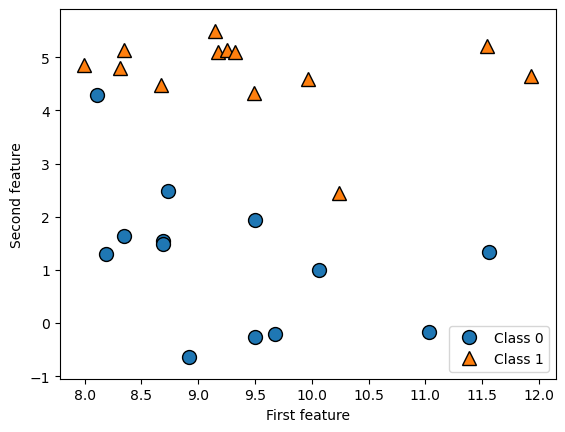

In [6]:
# generate dataset
X, y = mglearn.datasets.make_forge()

# plot dataset
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0', 'Class 1'])
plt.xlabel("First feature")
plt.ylabel('Second feature')

In [7]:
X.shape

(26, 2)

Text(0, 0.5, 'Target')

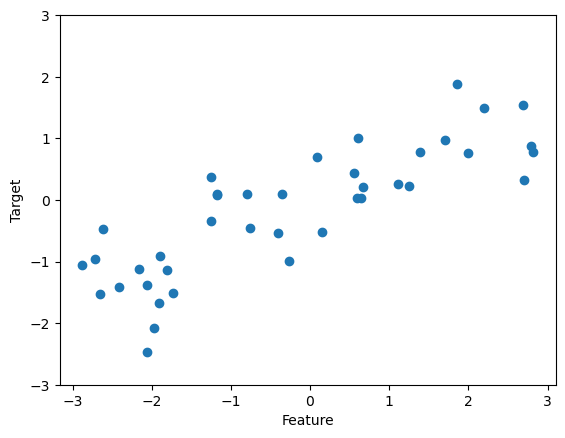

In [12]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [20]:
print("Sample counts per class:\n{}".format(
    {str(n): str(v) for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': '212', 'benign': '357'}


In [26]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [27]:
boston.shape

(1012, 11)

In [29]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

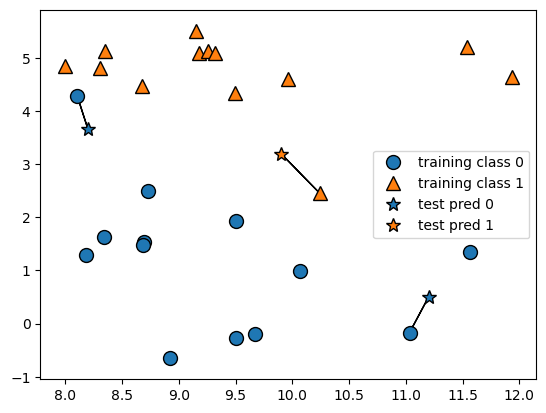

In [40]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

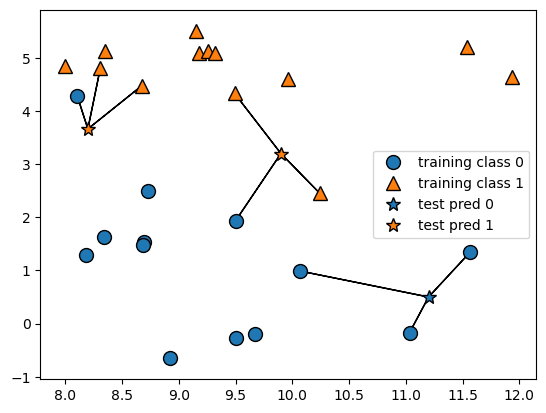

In [41]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [42]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [44]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8571428571428571

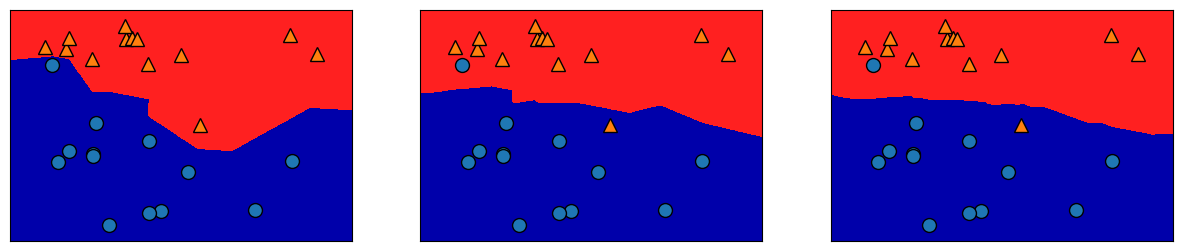

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

for n_neigbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neigbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

In [62]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

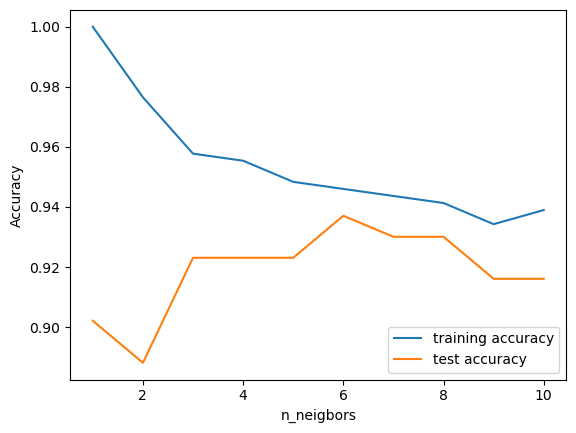

In [65]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neigbors")
plt.ylabel("Accuracy")
plt.legend(loc=4)

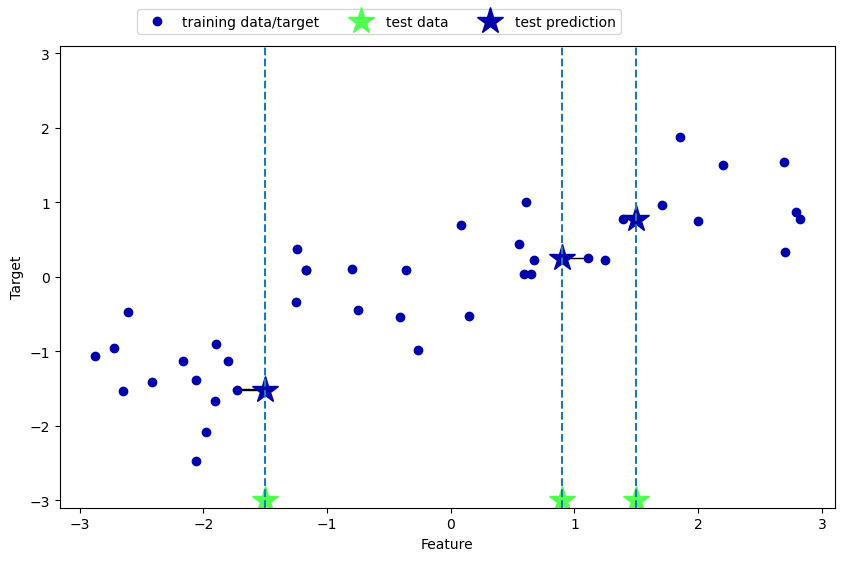

In [67]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

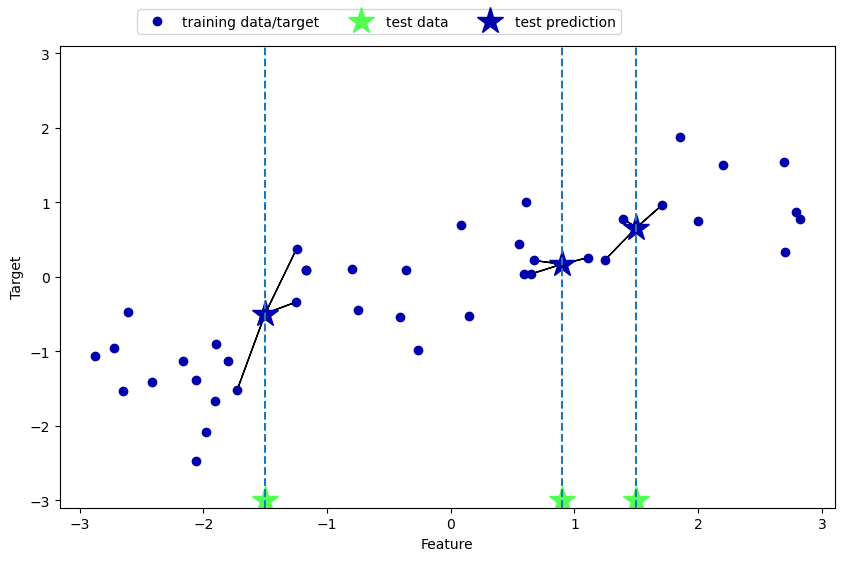

In [68]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [74]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [75]:
reg.score(X_test, y_test)

0.8344172446249606

w[0]: 0.393906  b: -0.031804


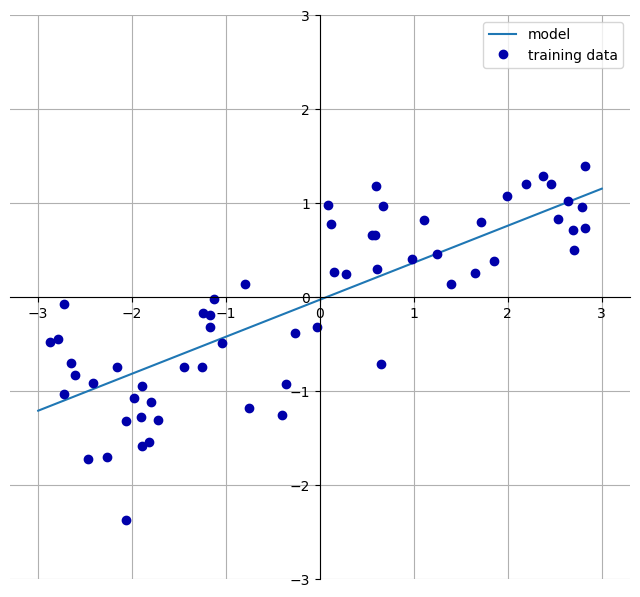

In [77]:
mglearn.plots.plot_linear_regression_wave()

In [87]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [88]:
print(lr.coef_[0])
print(lr.intercept_)

0.3939055511673397
-0.03180434302675966


In [92]:
print(f"Train set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Train set score: 0.67
Test set score: 0.66


In [95]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [96]:
lr.score(X_train, y_train)

0.952051960903273

In [97]:
lr.score(X_test, y_test)

0.6074721959666123

In [98]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

In [99]:
ridge.score(X_train, y_train)

0.885796658517094

In [101]:
ridge.score(X_test, y_test)

0.7527683481744758

In [105]:
ridge.coef_.min()

np.float64(-8.591499281027579)

In [106]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369616
0.6359411489177312


In [110]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.9282273685001988
0.7722067936480148


In [111]:
# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.29323768991114607
0.20937503255272294


In [112]:
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Number of features used: 4


In [122]:
lasso001 = Lasso(alpha=0.01, max_iter=1_000_000).fit(X_train, y_train)

print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))

0.89622265110865
0.7656571174549982


In [123]:
print(np.sum(lasso001.coef_ !=0))

33


In [127]:
lasso00001 = Lasso(alpha=0.0001, max_iter=1_000_000).fit(X_train, y_train)

print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))

0.9507158754515462
0.6437467421273347


In [128]:
print(np.sum(lasso00001.coef_ !=0))

96
